# Get data

## Peeringdb

In [1]:
import json
from pathlib import Path
import pandas as pd

filepath = Path('../../preprocessing/data/peeringdb/peeringdb_2_dump_2025_10_21.json')

with filepath.open('r', encoding='utf-8') as f:
    dump = json.load(f)

# extract the net.data section and load into a DataFrame
net_data = dump.get('net', {}).get('data')
if net_data is None:
    raise KeyError("JSON does not contain 'net' -> 'data' structure")

net_df = pd.DataFrame(net_data)
net_df['asn'] = net_df['asn'].astype(int)
net_df = net_df[net_df['info_type'] != '']

# show a quick preview
net_df.head()

,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,policy_ratio,policy_contracts,allow_ixp_update,status_dashboard,rir_status,rir_status_updated,logo,created,updated,status
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,True,Required,False,None,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2022-07-27T05:33:22Z,ok
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,False,Not Required,False,https://www.akamaistatus.com/,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-10-20T12:16:12Z,ok
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,False,Not Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-01-09T13:42:07Z,ok
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,True,Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2025-08-12T06:33:30Z,ok
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,False,Required,False,,ok,2024-06-26T04:47:55Z,None,2004-07-28T00:00:00Z,2022-11-28T22:55:17Z,ok


## Paths

In [2]:
rpki = pd.read_csv('/home/jhart/asn-classifier/scripts/as_metrics_with_rpki.csv')
rpki['asn'] = rpki['asn'].astype(int)
rpki.head()

,asn,seen_peers_path,visibility_path,seen_peers_origin,visibility_origin,centrality_mean,endprox_mean,nonterminal_rate,path_occurrences,origin_occurrences,total_unique_paths,total_peers,rpki_valid,rpki_invalid_as,rpki_invalid_length,rpki_not_found,rpki_total,rpki_valid_share
0,1,45,0.398230,45,0.398230,0.250000,0.125000,1.0,1,45,7611576,113,0,0,0,6,6,0.000000
1,2,84,0.743363,82,0.725664,0.616473,0.308236,1.0,90,82,7611576,113,1,33,0,10,44,0.022727
2,3,86,0.761062,87,0.769912,0.490238,0.245119,1.0,80,87,7611576,113,0,1,0,105,106,0.000000
3,4,90,0.796460,90,0.796460,0.400000,0.200000,1.0,2,90,7611576,113,1,0,0,48,49,0.020408
4,5,45,0.398230,43,0.380531,0.466667,0.233333,1.0,13,43,7611576,113,0,0,0,2,2,0.000000


## Merge data

In [3]:
merged_df = pd.merge(net_df, rpki, on='asn', how='left')
merged_df.fillna(0, inplace=True)
merged_df.head()


,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,path_occurrences,origin_occurrences,total_unique_paths,total_peers,rpki_valid,rpki_invalid_as,rpki_invalid_length,rpki_not_found,rpki_total,rpki_valid_share
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,39.0,0.0,7611576.0,113.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,16341.0,94.0,7611576.0,113.0,4808.0,1.0,2.0,37.0,4848.0,0.991749
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,0.0,47.0,7611576.0,113.0,2.0,0.0,0.0,0.0,2.0,1.000000
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,26375.0,85.0,7611576.0,113.0,363.0,0.0,0.0,44.0,407.0,0.891892
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,16056.0,81.0,7611576.0,113.0,5325.0,1.0,0.0,92.0,5418.0,0.982835


In [4]:

merged_df["info_type"].value_counts()

info_type
Cable/DSL/ISP           11787
NSP                      3982
Content                  2486
Enterprise               1721
Educational/Research     1457
Network Services          804
Route Server              623
Non-Profit                613
Government                126
Route Collector            31
Name: count, dtype: int64

In [5]:
merged_df.head()

,id,org_id,name,aka,name_long,website,social_media,asn,looking_glass,route_server,...,path_occurrences,origin_occurrences,total_unique_paths,total_peers,rpki_valid,rpki_invalid_as,rpki_invalid_length,rpki_not_found,rpki_total,rpki_valid_share
0,1,8897,GTT Communications (AS4436),Formerly known as nLayer Communications,,http://www.gtt.net,"[{'service': 'website', 'identifier': 'http://...",4436,,,...,39.0,0.0,7611576.0,113.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,2,14,Akamai Technologies,,,https://www.akamai.com/,"[{'service': 'website', 'identifier': 'https:/...",20940,,,...,16341.0,94.0,7611576.0,113.0,4808.0,1.0,2.0,37.0,4848.0,0.991749
2,3,17,DALnet IRC Network,,,http://www.dal.net,"[{'service': 'website', 'identifier': 'http://...",31800,,,...,0.0,47.0,7611576.0,113.0,2.0,0.0,0.0,0.0,2.0,1.000000
3,5,9350,Swisscom,IP-Plus,,http://www.swisscom.com,"[{'service': 'website', 'identifier': 'http://...",3303,,telnet://route-server.ip-plus.net,...,26375.0,85.0,7611576.0,113.0,363.0,0.0,0.0,44.0,407.0,0.891892
4,6,23,Cox Communications,Cox Communications,,http://www.cox.com/peering,"[{'service': 'website', 'identifier': 'http://...",22773,,,...,16056.0,81.0,7611576.0,113.0,5325.0,1.0,0.0,92.0,5418.0,0.982835


# Evaluate

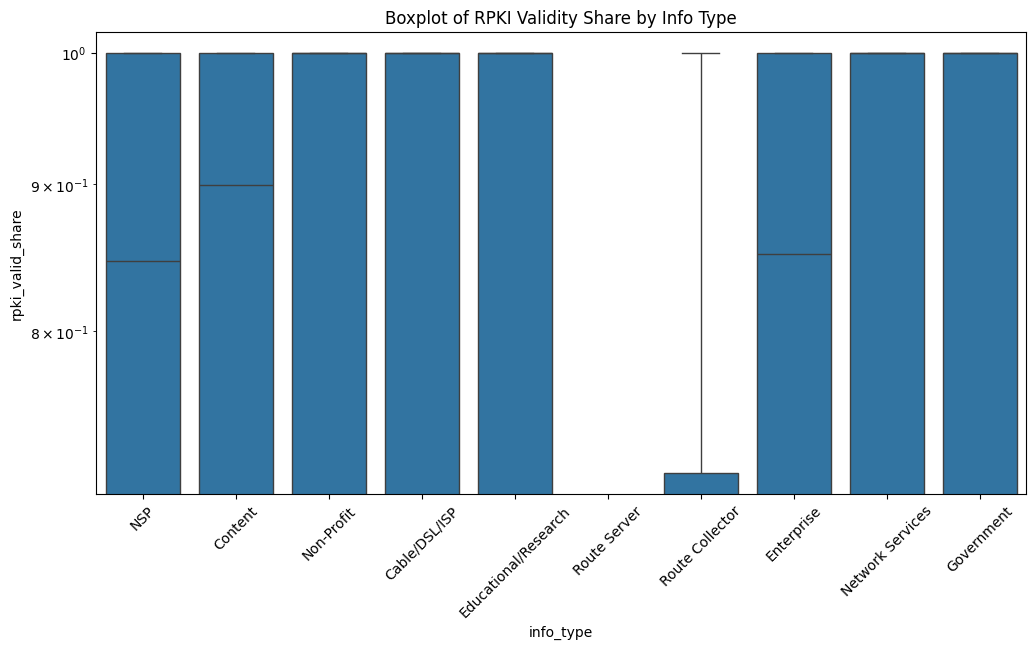

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='rpki_valid_share', showfliers=False)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title('Boxplot of RPKI Validity Share by Info Type')
plt.show()

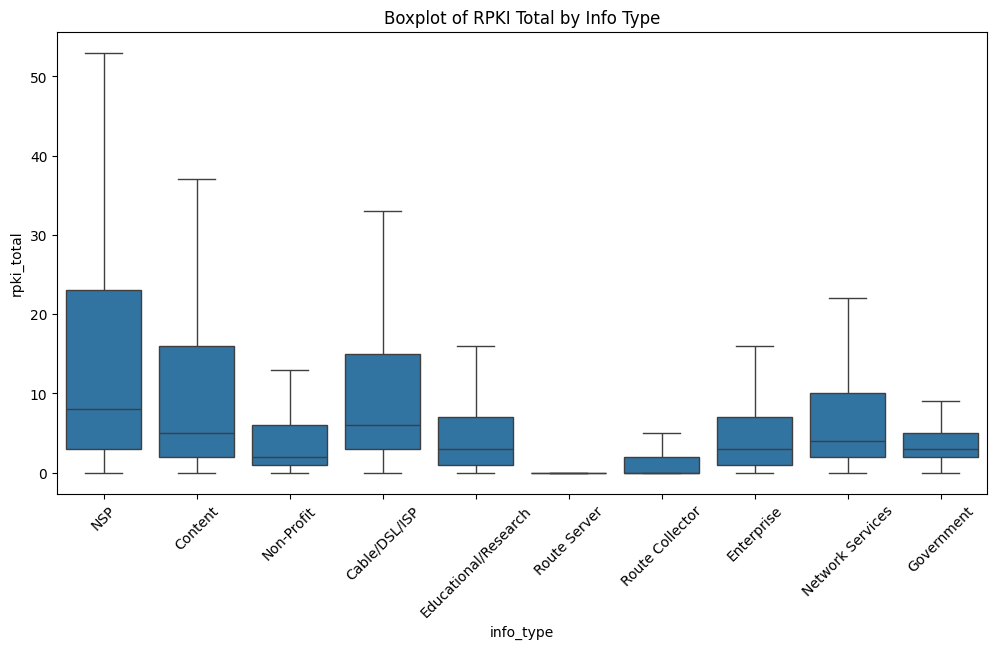

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='rpki_total', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of RPKI Total by Info Type')
plt.show()

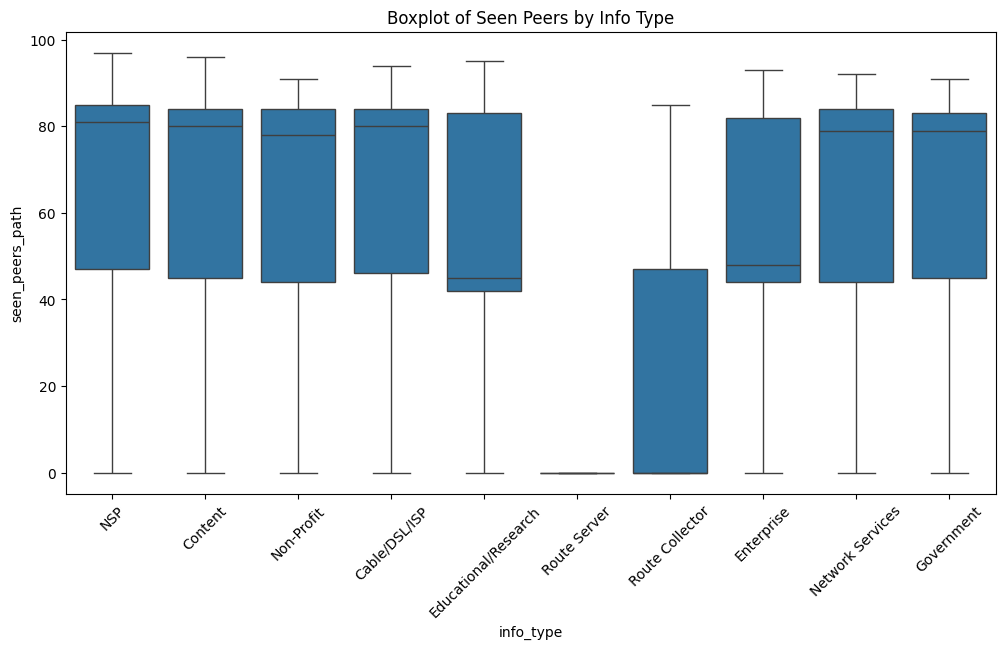

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='seen_peers_path', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Seen Peers by Info Type')
plt.show()

In [9]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='path_origin_ratio', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Path Origin Ratio by Info Type')
plt.show()

ValueError: Could not interpret value `path_origin_ratio` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

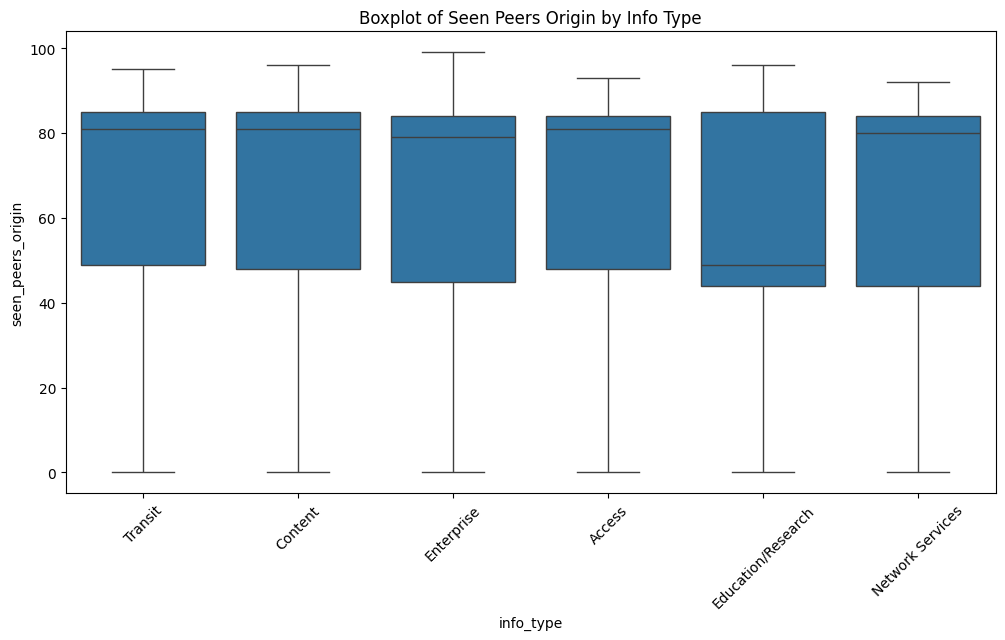

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='seen_peers_origin', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Seen Peers Origin by Info Type')
plt.show()

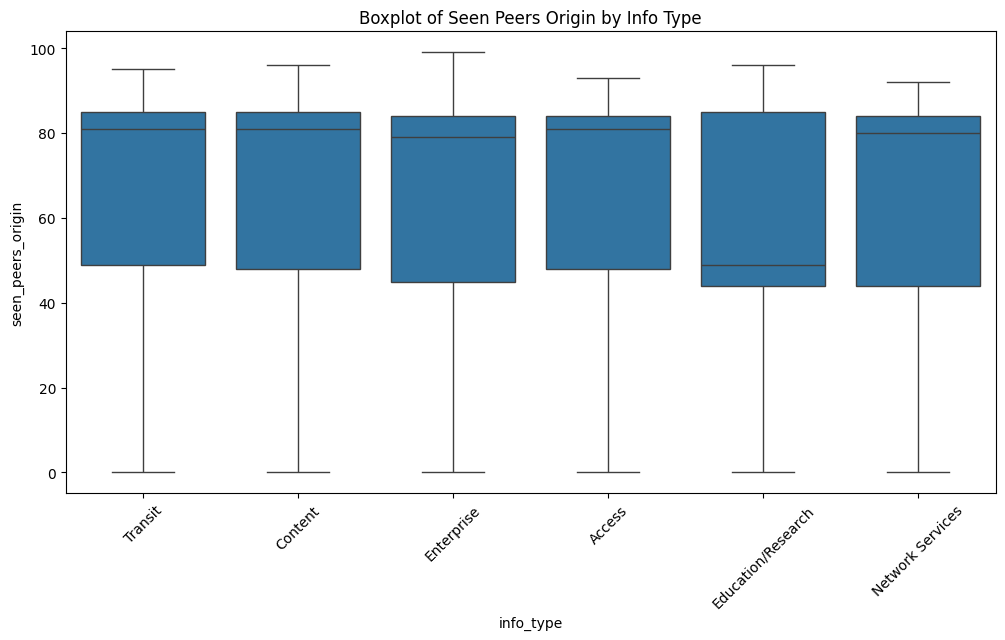

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='seen_peers_origin', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Seen Peers Origin by Info Type')
plt.show()

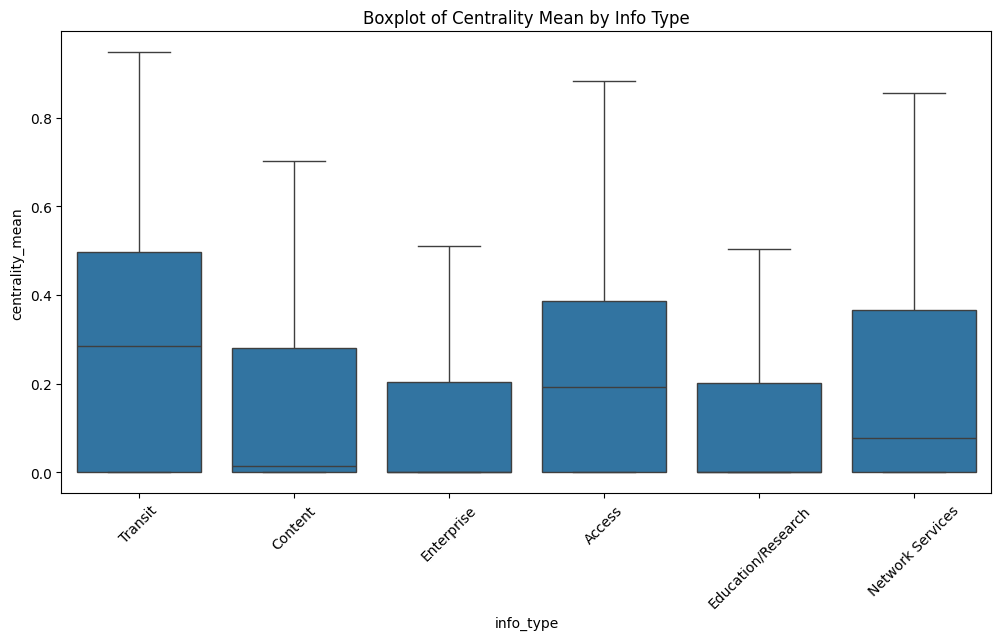

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='centrality_mean', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Centrality Mean by Info Type')
plt.show()

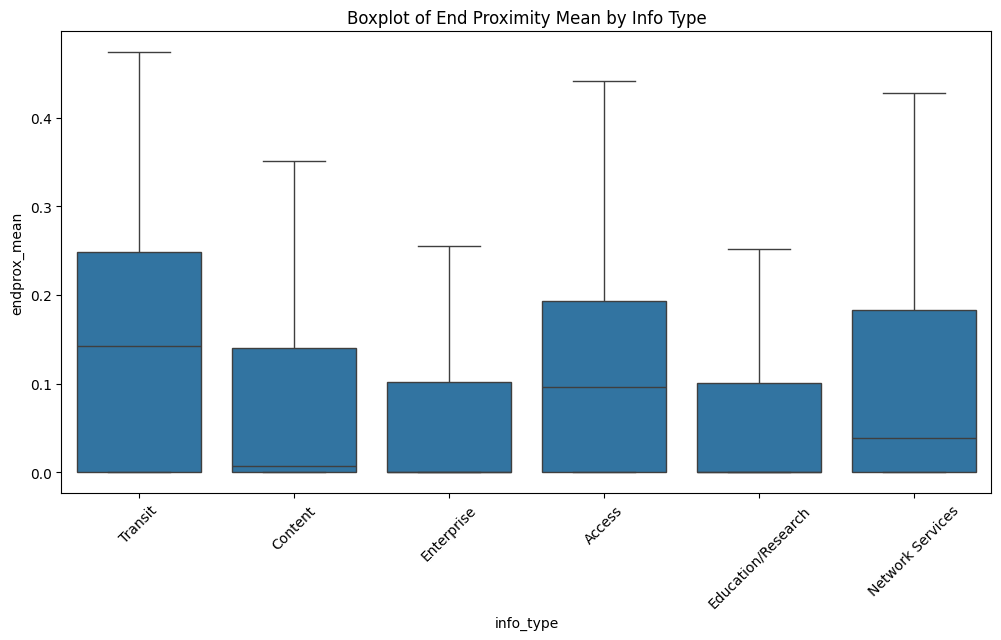

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='endprox_mean', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of End Proximity Mean by Info Type')
plt.show()

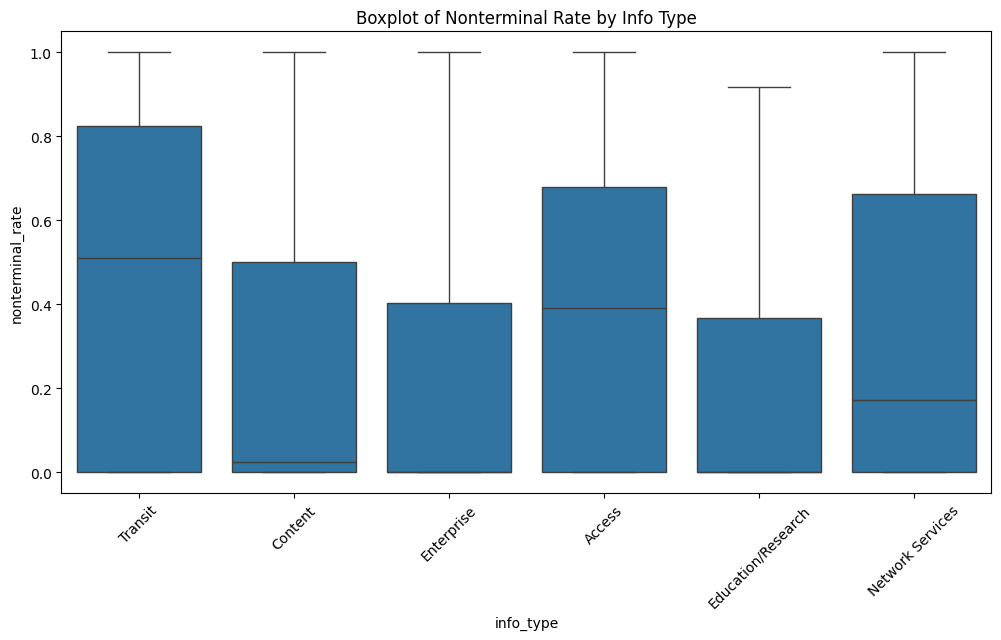

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='nonterminal_rate', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Nonterminal Rate by Info Type')
plt.show()

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


# Create boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='info_type', y='rpki_valid_share', showfliers=False)
plt.xticks(rotation=45)
plt.title('Boxplot of Nonterminal Rate by Info Type')
plt.show()

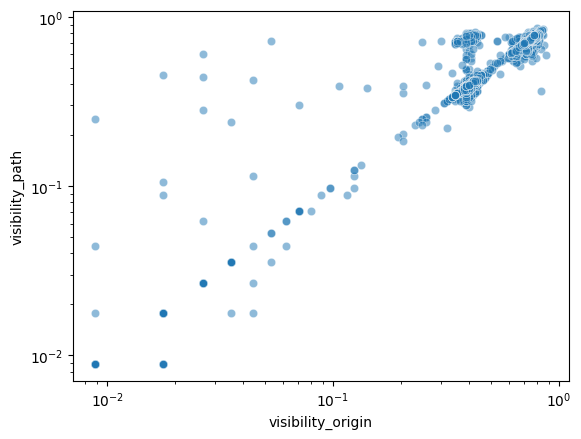

In [ ]:
sns.scatterplot(
    data=merged_df,
    x="visibility_origin",
    y="visibility_path",
    alpha=0.5
)
plt.xscale("log"); plt.yscale("log")
